<a href="https://colab.research.google.com/github/alejandracardonavelasco/ML-/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework Lab 4**

First, let's generate a synthetic dataset based on a known linear relationship:

$
y = \beta_0 + \sum_{j=1}^{p} \beta_j x_j + \epsilon
$
, where

$
\epsilon \sim \mathcal{N}(0, \sigma^2)
$.

We are going to use a high-dimensional setting, in this case 50 with only a few non-zero true coefficients (5) to emphasize the effects of regularization.

The $\beta_j$ coefficients are known for this experiment and they are mostly 0, with only a five non-zero parameters.

In [1]:
import numpy as np

np.random.seed(42)

# Define parameters
n_samples = 100  # Number of data points
n_features = 50  # Number of predictors
n_nonzero_coefs = 5

# Generate random X matrix
X = np.random.randn(n_samples, n_features)

# Generate true beta coefficients (mostly 0)
true_beta = np.zeros(n_features)
nonzero_indices = np.random.choice(n_features, n_nonzero_coefs, replace=False)
true_beta[nonzero_indices] = np.random.uniform(-1, 1, n_nonzero_coefs)
print(f"The known beta coefficients vector is {true_beta}")

# Generate response variable y
y = X @ true_beta + np.random.normal(scale=1.0, size=n_samples)

The known beta coefficients vector is [ 0.          0.          0.          0.          0.23090284 -0.61461781
  0.          0.          0.          0.          0.          0.
  0.          0.          0.35492671  0.          0.21277223  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.05154067  0.          0.          0.
  0.          0.        ]


Let's split the data into three sets: training, validation, and testing.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% each for validation and testing

Now, let's investigate how increasing $\lambda$ influences the model’s bias, variance, and Mean Squared Error (MSE).

In order to do this, first we need to do the Lasso and Ridge regression considering different values for $\lambda$ and calculate its respective MSE, Bias and Variance.

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

# Define a range of lambda values
lambda_values = np.logspace(-4, 4, 30)  # From 10^-4 to 10^4

# Store results
ridge_mse, lasso_mse = [], []
ridge_bias, lasso_bias = [], []
ridge_variance, lasso_variance = [], []

# Repeat with different values of lambda
for lam in lambda_values:
    # Ridge Regression
    ridge_model = Ridge(alpha=lam)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    # MSE, Bias, Variance for Ridge
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    variance_ridge = np.var(y_pred_ridge)
    bias_ridge = mse_ridge - variance_ridge

    ridge_mse.append(mse_ridge)
    ridge_bias.append(bias_ridge)
    ridge_variance.append(variance_ridge)

    # Lasso Regression
    lasso_model = Lasso(alpha=lam)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)

    # MSE, Bias, Variance for Lasso
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    variance_lasso = np.var(y_pred_lasso)
    bias_lasso = mse_lasso - variance_lasso

    lasso_mse.append(mse_lasso)
    lasso_bias.append(bias_lasso)
    lasso_variance.append(variance_lasso)

Let's plot Bias², Variance, and MSE on a single graph for both Ridge and Lasso models.

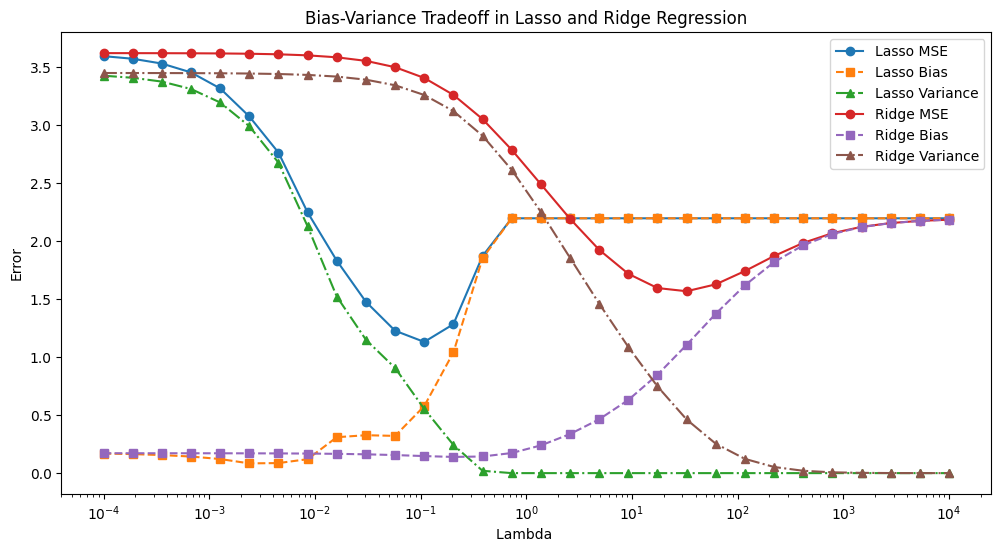

In [ ]:
import matplotlib.pyplot as plt

# Plot Bias, Variance, and MSE vs. Lambda
plt.figure(figsize=(12, 6))

# Lasso
plt.plot(lambda_values, lasso_mse, label="Lasso MSE", linestyle='-', marker='o')
plt.plot(lambda_values, lasso_bias, label="Lasso Bias", linestyle='--', marker='s')
plt.plot(lambda_values, lasso_variance, label="Lasso Variance", linestyle='-.', marker='^')

# Ridge
plt.plot(lambda_values, ridge_mse, label="Ridge MSE", linestyle='-', marker='o')
plt.plot(lambda_values, ridge_bias, label="Ridge Bias", linestyle='--', marker='s')
plt.plot(lambda_values, ridge_variance, label="Ridge Variance", linestyle='-.', marker='^')

plt.xscale("log")
plt.xlabel("Lambda ")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff in Lasso and Ridge Regression")
plt.legend()

plt.show()

## **Question: How does varying the regularization parameter in Ridge and Lasso regression impact the trade-off between bias and variance?**

###**How does increasing $\lambda$ influences the model’s bias, variance, and Mean Squared Error (MSE)?**

**Observations:**
- MSE follows a U-shape: It decreases initially but increases for very high
$\lambda$.
- Bias² increases with larger $\lambda$, as models become more constrained.
- Variance decreases with larger $\lambda$, making the model more stable.

**1. Lasso Regression:**
- Bias² increases rapidly as $\lambda$ increases → This is because Lasso forces some coefficients exactly to zero (feature selection).
- Variance decreases sharply → Fewer features are used, reducing model complexity.
- MSE decreases at first but rises at high $\lambda$ → This suggests an optimal
$\lambda$ balancing Bias² and Variance.

**2. Ridge Regression:**
- Bias² increases gradually as $\lambda$ increases → Ridge reduces coefficients but does not force them to zero.
- Variance decreases smoothly → Regularization stabilizes the model.
- MSE decreases initially, then increases at very high $\lambda$ → Suggests an optimal balance between Bias² and Variance.

## **Bias-Variance Tradeoff in Ridge vs. Lasso**
- Lasso selects the most relevant features by setting some coefficients to zero, making it ideal when only a few predictors matter. It simplifies models, improves interpretability, and works best when irrelevant features exist. However, it struggles with collinear predictors and small datasets, potentially removing too many features.

- Ridge reduces the coefficients but keeps them, making it ideal when all features contribute. It handles multicollinearity well, stabilizes models with small sample sizes, and ensures all features remain in the model. However, it does not perform feature selection, keeping irrelevant variables.

## **MSE Decomposition into Bias and Variance**
The Mean Squared Error (MSE) can be decomposed into three components: bias, variance, and irreducible noise.

First, lets give the definition of all components:

1. $\text{MSE} = \mathbb{E}[(y - \hat{y})^2]$
where:

- $\text{y}$ is the true value
- $\hat{y}$ is the predicted value
- $\mathbb{E}$ represents the expectation over different training sets.

2. Bias² measures how much the average prediction deviates from the true function:

$\text{Bias}^2 = (\mathbb{E}[\hat{y}] - y)^2
$
3. Variance measures the variability of predictions for different training sets:

$\text{Variance} = \mathbb{E}[(\mathbb{E}[\hat{y}] - \hat{y})^2]$
4. The Irreducible Error $\sigma^2$ represents noise in the data that no model can remove.

**Bias-Variance Descomposition:**

$\text{MSE} = \mathbb{E}[(y - \hat{y})^2] = \mathbb{E}[(y - \mathbb{E}[\hat{y}] + \mathbb{E}[\hat{y}] - \hat{y})^2]$

Expanding the squared term:

$\text{MSE} = \mathbb{E}[(y - \mathbb{E}[\hat{y}])^2] + \mathbb{E}[(\mathbb{E}[\hat{y}] - \hat{y})^2] + 2 \mathbb{E}[(y - \mathbb{E}[\hat{y}])(\mathbb{E}[\hat{y}] - \hat{y})] = \text{Bias}^2 + \text{Variance} + \sigma^2
$



**Conclusions:**
- High bias, low variance → The model is too simple
- Low bias, high variance → The model is too complex and captures noise

The best model balances bias and variance to achieve low MSE. This decomposition helps in understanding why regularization (Ridge/Lasso) works: by increasing bias slightly while reducing variance, leading to better generalization



## **Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**
Yes, regularization leads to an optimal trade-off point where MSE is minimized. This happens because of the bias-variance trade-off:

For very small $\lambda$ (little or no regularization), the model has low bias but high variance (overfitting). It captures noise in the training data, leading to high test MSE.

For very large $\lambda$ (strong regularization), the model has high bias but low variance (underfitting). It oversimplifies the data, which also increases MSE.

At an optimal $\lambda$, Bias and variance are balanced, minimizing MSE.
The model captures meaningful patterns without overfitting or underfitting.

The existence of an optimal $\lambda$ where MSE is minimized is a direct result of the bias-variance descomposition of the MSE. Since both functions Bias² and Variance change monotonically in opposite directions, their sum must have a minimum point where MSE is lowest.